# Stock Market Analysis Project


In this mini-project we will be analyzing stock data related to a few car companies, from Jan 1 2012 to Jan 1 2017.This mini-project is meant to mainly deal with learning the libraries that we use for visulazation and data analysis.The main objective of this notebook is to hone your skills with matplotlib, pandas, and numpy.

### Part 0: Import

** Import the various libraries  which you will need**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

____
## Part 1: Getting the Data

### Tesla Stock (Ticker: TSLA on the Google Finance)

### Ford Stock (Ticker: F on the Google Finance)

### GM Stock (Ticker: GM on the Google Finance)





In [2]:
tesla = pd.read_csv('Tesla_Stock.csv',index_col='Date',parse_dates=True)

tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


In [3]:
ford = pd.read_csv('Ford_Stock.csv',index_col='Date',parse_dates=True)
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


In [4]:
gm = pd.read_csv('GM_Stock.csv',index_col='Date',parse_dates=True)
gm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


## Part 2: Visualizing the Data

** Time to visualize the data. **


____

** Recreate this linear plot of all the stocks' Close ! **

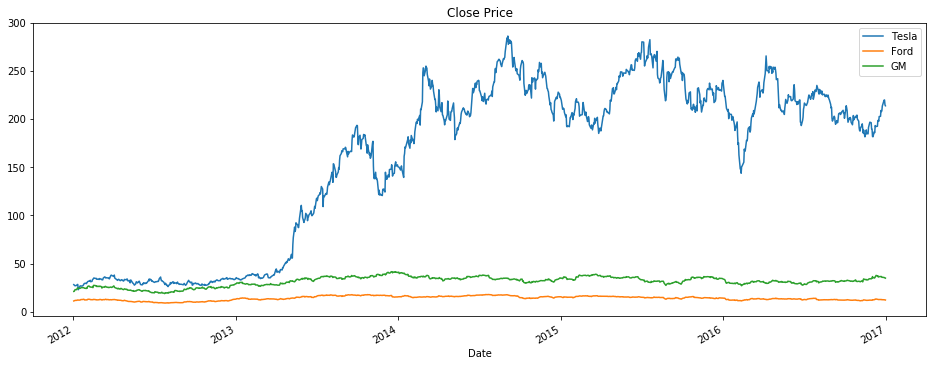

In [7]:
tesla['Close'].plot(label='Tesla',figsize=(16,6),title='Close Price')
ford['Close'].plot(label='Ford')
gm['Close'].plot(label='GM')
plt.legend()


____

** Plot the Volume of stock traded each day.**

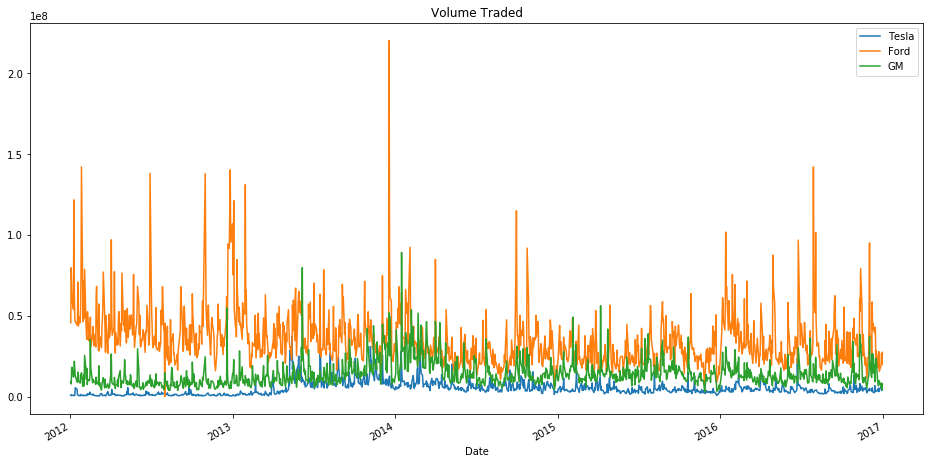

In [5]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
ford['Volume'].plot(label='Ford')
gm['Volume'].plot(label='GM')
plt.legend()

** Interesting, looks like Ford had a really big spike somewhere in late 2013. What was the date of this maximum trading volume for Ford?**

**Bonus: What happened that day? **

In [10]:
ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

In [27]:
dates = pd.date_range('2013-12-01 00:00:00', periods=30)

In [42]:
df_ford = pd.DataFrame(ford['Close'],index=dates).dropna()
df_ford1 = pd.DataFrame(ford['Volume'],index=dates).dropna()


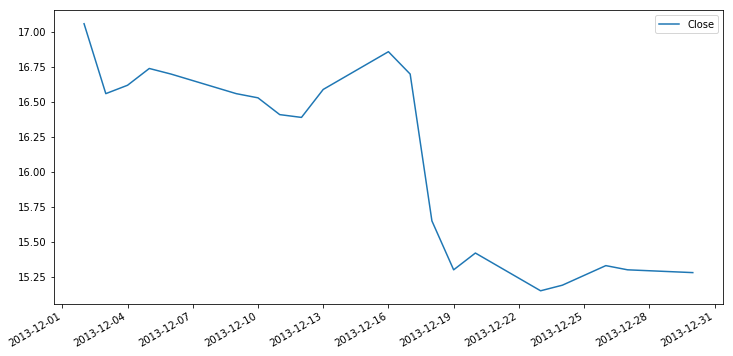

In [47]:
# df_ford [''] = (df_ford['Close']/df_ford['Close'].shift(1))-1
df_ford['Close'].plot(figsize=(12,6),label='Close')
#df_ford1['Volume'].plot(label='Volume')
plt.legend()

## What happened that day?
#### Ford at investor coference announced that it is going ahead with its plan to launch 22 products globally next year, which is more than double the current year. This capital expenditure is expected to pinch the profit margins. Thus the investors are factoring the new profit margin and thus the spike in the trading activity on the day and fall in the stock price.



____

###  Lets create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.

In [6]:
tesla['Total_Traded']= tesla['Open'] * tesla['Volume']
ford['Total_Traded'] = ford['Open'] * ford['Volume']
gm['Total_Traded'] = gm['Open'] * gm['Volume']     

** Plot this "Total Traded" against the time index.**

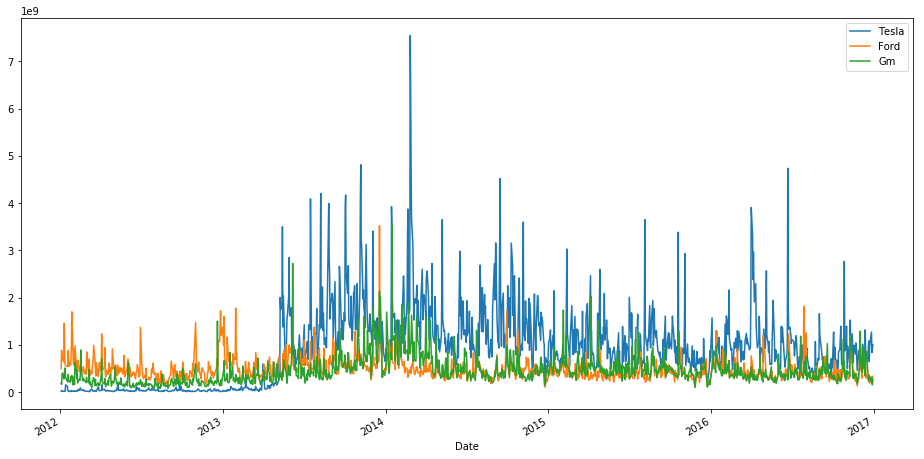

In [7]:
tesla['Total_Traded'].plot(label='Tesla',figsize=(16,8))
ford['Total_Traded'].plot(label='Ford')
gm['Total_Traded'].plot(label='Gm')
plt.legend()

** Itlooks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened? **

#### What date was that and what happened?  
There was a lot of good news for tesla starting with its ** *Tesla Model S* ** rated as the best car of 2014 by the Consumer Report. On top of that the share surged a massive ** *14% rally* ** on the reports that, Tesla is expected to officially announce plans to open a massive new lithium battery factory, dubbed the "Gigafactory," which CEO Elon Musk says will have capacity equal to all factories making such batteries around the globe.

In [65]:
tesla['Total_Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

In [66]:
df_tesla = pd.DataFrame(tesla['returns'],index=pd.date_range('2014-02-01 00:00:00', periods=30)).dropna()
df_tesla1 = pd.DataFrame(tesla['Close'],index=pd.date_range('2013-09-01 00:00:00', periods=180)).dropna()

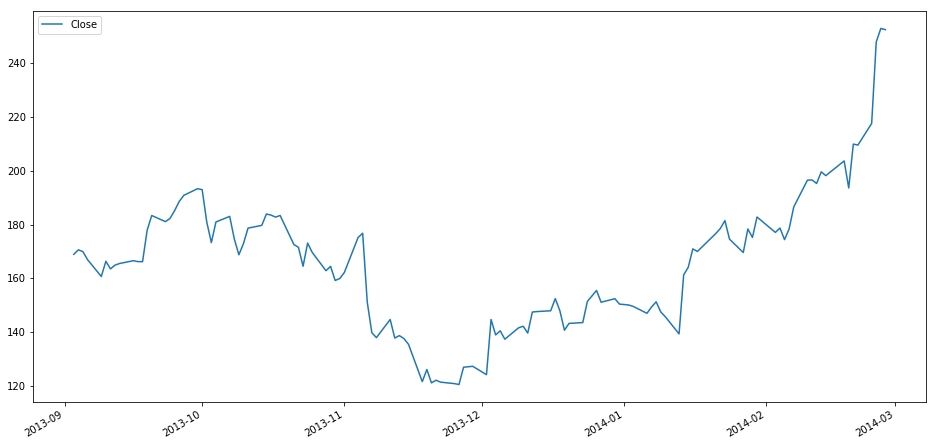

In [64]:
df_tesla1.plot(figsize=(16,8))

____

** Let's plot some MA (Moving Averages). Plot out the MA50 and MA200 for Tesla. **

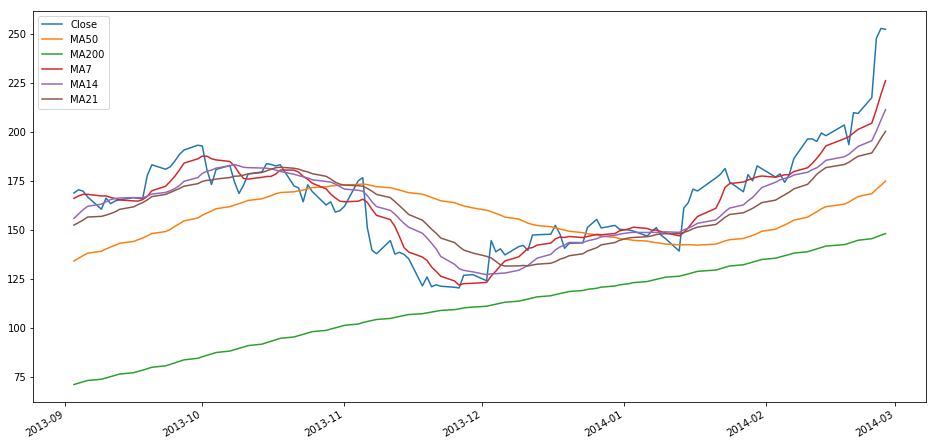

In [75]:
# Code here
tesla['MA50'] = tesla['Close'].rolling(window=50).mean()
df_tesla_MA50 = pd.DataFrame(tesla['MA50'],index=pd.date_range('2013-09-01 00:00:00', periods=180)).dropna()
tesla['MA200'] = tesla['Close'].rolling(window=200).mean()
df_tesla_MA200 = pd.DataFrame(tesla['MA200'],index=pd.date_range('2013-09-01 00:00:00', periods=180)).dropna()
tesla['MA7'] = tesla['Close'].rolling(window=7).mean()
df_tesla_MA7 = pd.DataFrame(tesla['MA7'],index=pd.date_range('2013-09-01 00:00:00', periods=180)).dropna()
tesla['MA14'] = tesla['Close'].rolling(window=14).mean()
df_tesla_MA14 = pd.DataFrame(tesla['MA14'],index=pd.date_range('2013-09-01 00:00:00', periods=180)).dropna()
tesla['MA21'] = tesla['Close'].rolling(window=21).mean()
df_tesla_MA21 = pd.DataFrame(tesla['MA21'],index=pd.date_range('2013-09-01 00:00:00', periods=180)).dropna()
df_tesla1['Close'].plot(figsize=(16,8))
df_tesla_MA50['MA50'].plot()
df_tesla_MA200['MA200'].plot()
df_tesla_MA7['MA7'].plot()
df_tesla_MA14['MA14'].plot() 
df_tesla_MA21['MA21'].plot()
plt.legend()

______

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot.**

In [76]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [77]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

In [78]:
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,28.94,20.83,11.00
2012-01-04,28.21,21.05,11.15
2012-01-05,27.76,21.10,11.33
2012-01-06,27.20,22.26,11.74
2012-01-09,27.00,23.20,11.83


In [79]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1191e5b00>,
      dtype=object)

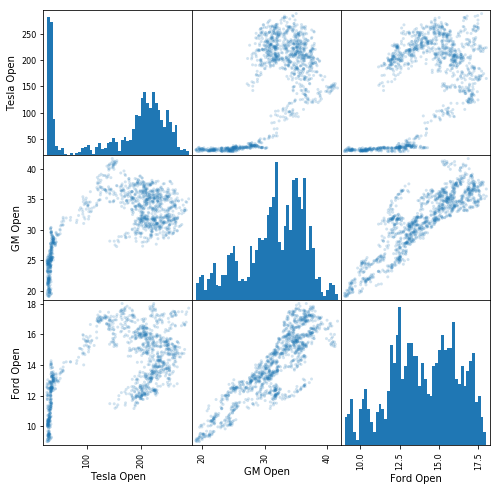

In [80]:
scatter_matrix(car_comp, alpha=0.2, figsize=(8, 8), diagonal='hist',hist_kwds={'bins':50})

** Create a CandleStick chart for Ford in Jan-Feb 2012 **

In [8]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [19]:
fordohcl = ford.loc['2012-01':'2012-02']

In [20]:
fordohcl.iplot(kind='candle',theme='solar',up_color='green',down_color='red')

____
#  Basic Financial Analysis

Now it is time to focus on a few key financial calculations. 

Let's begin!
____

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

** Create a new column for each dataframe called returns. This column will be calculated from the Close price column.**

In [81]:
tesla['returns'] = tesla['Close'].pct_change(1)

In [82]:
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"?**

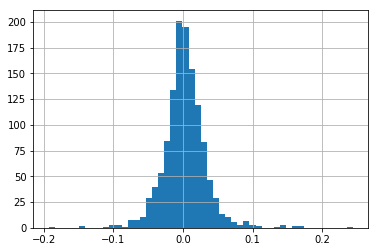

In [83]:
tesla['returns'].hist(bins=50)

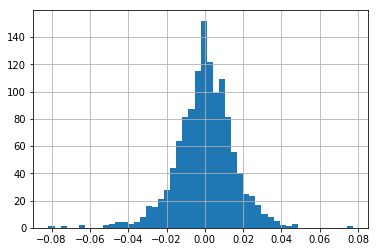

In [84]:
ford['returns'].hist(bins=50)

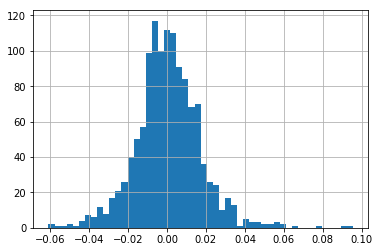

In [85]:
gm['returns'].hist(bins=50)

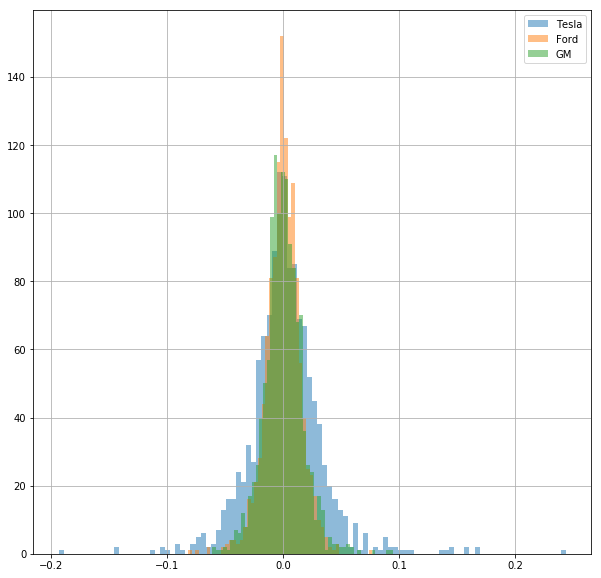

In [86]:
tesla['returns'].hist(bins=100,label="Tesla",figsize=(10,10),alpha=0.5)
ford['returns'].hist(bins=50,label='Ford',alpha=0.5)
gm['returns'].hist(bins=50,label='GM',alpha=0.5)
plt.legend()

** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

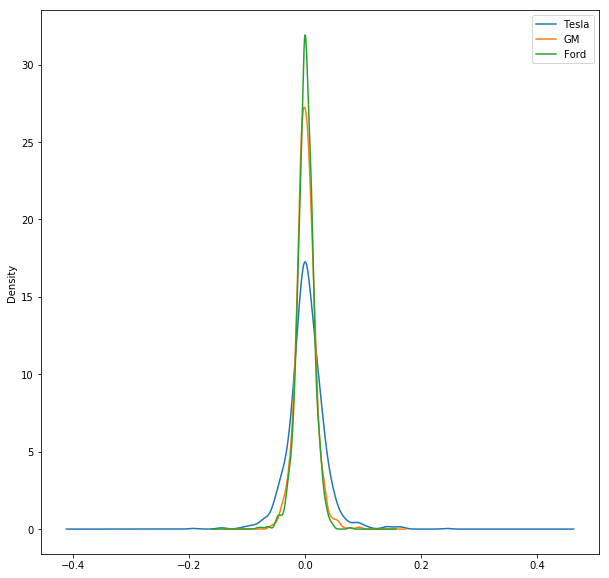

In [87]:
tesla['returns'].plot(kind='kde',label="Tesla",figsize=(10,10),grid=False)
gm['returns'].plot(kind='kde',label="GM")
ford['returns'].plot(kind='kde',label="Ford")
plt.legend()

** Try also creating some box plots comparing the returns. **

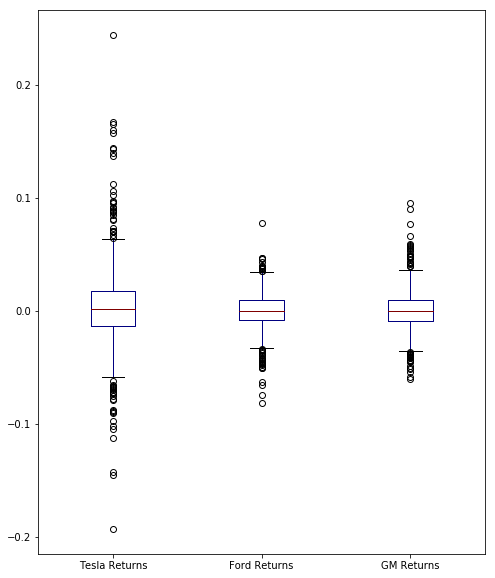

In [91]:
box_df = pd.concat([tesla['returns'],ford['returns'],gm['returns']],axis=1)
box_df.columns = ['Tesla Returns','Ford Returns','GM Returns']
box_df.plot(kind='box',figsize=(8,10),colormap='jet')

## Comparing Daily Returns between Stocks

** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bcf2cf8>,
      dtype=object)

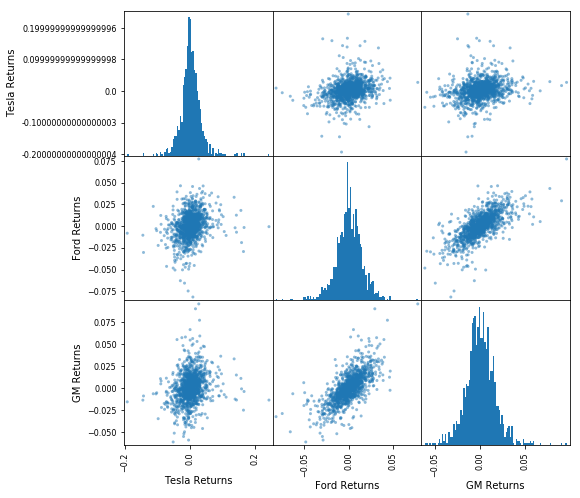

In [89]:
scatter_matrix(box_df, figsize=(8, 8), diagonal='hist',hist_kwds={'bins':100})

** It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

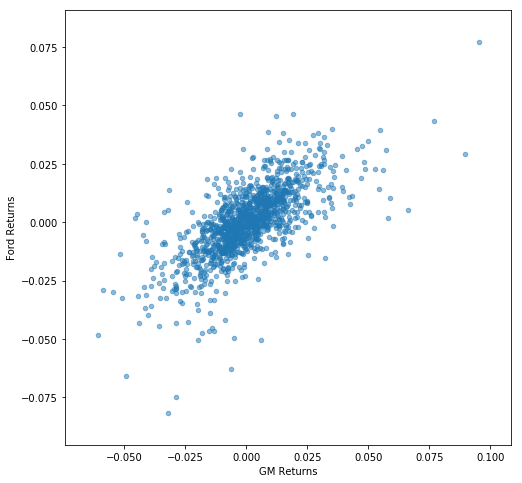

In [93]:
box_df.plot(x='GM Returns',y='Ford Returns',kind='scatter',figsize=(8,8),alpha=0.5)

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

In [94]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [95]:
tesla.head()

,Open,High,Low,Close,Volume,Total_Traded,returns,MA50,MA200,MA7,MA14,MA21,Cumulative Return
Date,,,,,,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,NaN,NaN,NaN,NaN,NaN,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,NaN,NaN,NaN,NaN,NaN,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,NaN,NaN,NaN,NaN,NaN,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,NaN,NaN,NaN,NaN,NaN,0.970442


In [96]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

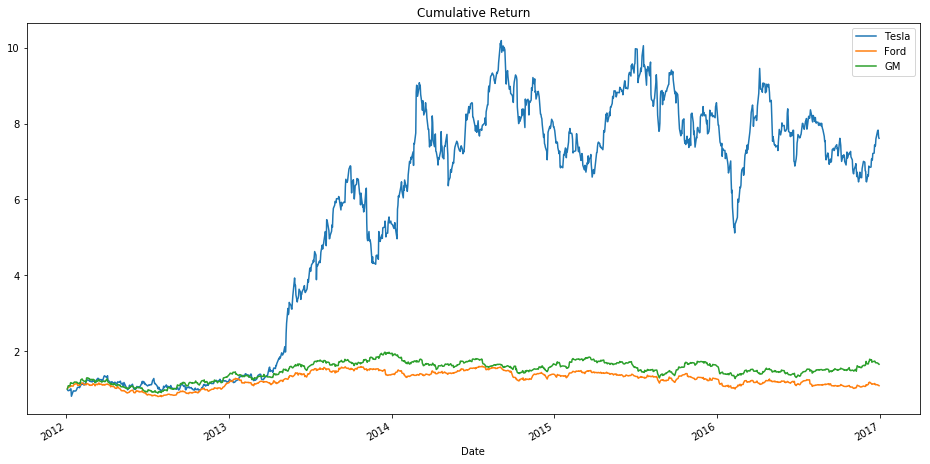

In [97]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()

# Thank You!

